#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)




# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [1]:
# carga de datos
import pandas as pd
import io
# from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns



# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [6]:
def read_files (nombre_archivo):
  # uploaded = files.upload()
  # for fn in uploaded.keys():
  #   print('User uploaded file "{name}" with length {length} bytes'.format(
  #       name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(nombre_archivo)
    return df

En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [7]:
train_feat = read_files("dengue_features_train.csv")
train_feat.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
train_feat.shape

(1456, 24)

Posteriormente subimos los datos que únicamente nos proporcionan el número de casos de dengue para las semanas de entrenamiento (dengue_labels_train)

In [10]:
train_labels = read_files("dengue_labels_train.csv")
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [11]:
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])

train.head(455)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,sj,1998,52,1998-12-24,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
452,sj,1999,1,1999-01-08,NaN,-0.087600,0.188700,0.163417,45.39,298.700000,...,80.597143,45.39,16.452857,2.428571,25.571429,5.471429,28.9,22.2,16.2,56
453,sj,1999,2,1999-01-15,-0.139900,-0.037633,0.181383,0.144843,0.00,298.482857,...,76.954286,0.00,15.492857,1.671429,25.071429,5.728571,28.3,20.0,20.6,77


# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [12]:
train.drop("week_start_date", axis = 1, inplace = True)
train.head(453)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,sj,1998,50,0.061900,0.002633,0.213300,0.173014,152.94,298.094286,298.150000,...,85.911429,152.94,16.965714,1.357143,25.814286,5.014286,28.9,22.8,97.6,73
449,sj,1998,51,-0.082167,-0.091675,0.239900,0.170057,16.76,299.042857,299.100000,...,78.668571,16.76,16.408571,1.971429,26.071429,5.542857,31.1,22.8,18.9,89
450,sj,1998,52,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68
451,sj,1999,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [13]:
pd.isnull(train).any()
train.head(455)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,sj,1998,52,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68
451,sj,1999,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
452,sj,1999,1,NaN,-0.087600,0.188700,0.163417,45.39,298.700000,298.814286,...,80.597143,45.39,16.452857,2.428571,25.571429,5.471429,28.9,22.2,16.2,56
453,sj,1999,2,-0.139900,-0.037633,0.181383,0.144843,0.00,298.482857,298.550000,...,76.954286,0.00,15.492857,1.671429,25.071429,5.728571,28.3,20.0,20.6,77


Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [14]:
# ffill: propagate last valid observation forward to next valid backfill
# Otra Opción: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()
train.head(455) # Para ver cómo queda la fila 451 que tiene columnas sin informar

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,sj,1998,52,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68
451,sj,1999,53,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,78.418571,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,59
452,sj,1999,1,0.060567,-0.087600,0.188700,0.163417,45.39,298.700000,298.814286,...,80.597143,45.39,16.452857,2.428571,25.571429,5.471429,28.9,22.2,16.2,56
453,sj,1999,2,-0.139900,-0.037633,0.181383,0.144843,0.00,298.482857,298.550000,...,76.954286,0.00,15.492857,1.671429,25.071429,5.728571,28.3,20.0,20.6,77


También tenemos que transformar nuestras variables categóricas, en este caso una única variable que es la ciudad para lo que vamos a utilizar un *binarizador* para train y para test

In [15]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
train.head(455) # PAra ver como queda la nueva columna city_bin. Se muestra a la derecha del todo

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,sj,1998,52,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,68,1
451,sj,1999,53,0.060567,-0.130950,0.157150,0.098187,0.00,299.282857,299.435714,...,0.00,16.564286,2.128571,25.928571,6.042857,30.0,22.2,29.7,59,1
452,sj,1999,1,0.060567,-0.087600,0.188700,0.163417,45.39,298.700000,298.814286,...,45.39,16.452857,2.428571,25.571429,5.471429,28.9,22.2,16.2,56,1
453,sj,1999,2,-0.139900,-0.037633,0.181383,0.144843,0.00,298.482857,298.550000,...,0.00,15.492857,1.671429,25.071429,5.728571,28.3,20.0,20.6,77,1


In [16]:
# separamos los datos por ciudades
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']

# Selecciono sólo los últimos 5 años de cada ciudad. El motivo es que los datos de test que se van a utilizar para validar el modelo corresponden a 5 años
train_sj = train_sj[train_sj.year >=2003]
train_sj = train_sj[train_sj.year <=2007]
train_sj.head(312)

train_iq = train_iq[train_iq.year >=2005]
train_iq = train_iq[train_iq.year <=2009]
train_iq.head(312)

#train_concat =  np.concatenate((train_sj,train_iq))
train_concat = pd.concat([train_sj, train_iq], axis=0)

In [17]:
#feature_columns = ['city_bin', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
#       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
#       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
#       'reanalysis_precip_amt_kg_per_m2',
#       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
#       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
#       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
#       'station_min_temp_c', 'station_precip_mm']

feature_columns = ['city_bin', 'year', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

Hay que seleccionar características, pueden ser todas, pero eso normalmente no es una buena idea, por lo que aquí dejaremos algunas seleccionadas. Previamente observamos la correlación que hay entre ellas.

<Axes: >

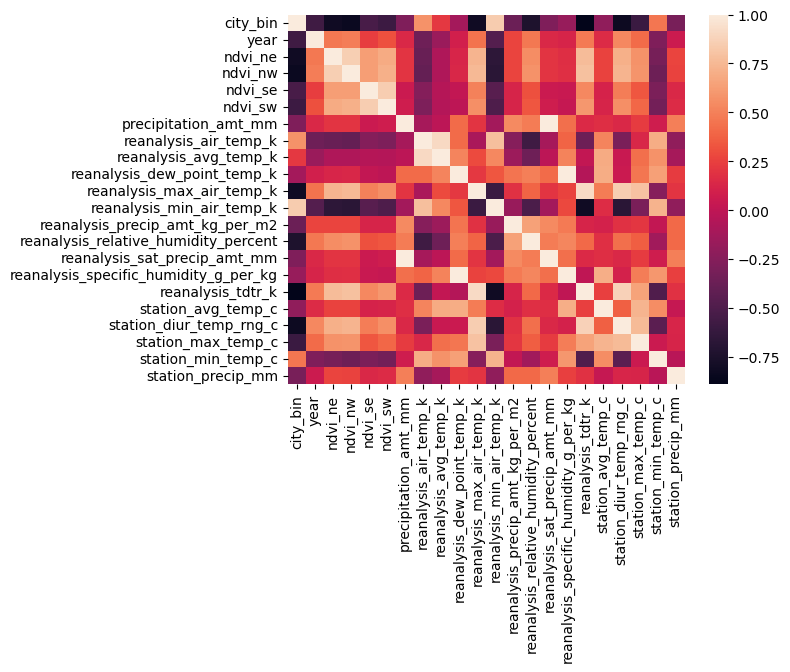

In [18]:
import seaborn as sns

mtx_corr = train_concat[feature_columns].corr()
# plot the heatmap and annotation on it
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

In [19]:
#selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']
selected_features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'precipitation_amt_mm']


Normalizamos los datos a partir de los coeficientes mínimo y máximo de la colección de entrenamiento.

**(Es opcional y no siempre efectivo)**

In [20]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_concat[selected_features])
y_train = train_concat['total_cases']


# Construcción y evaluación preliminar del modelo

In [21]:
from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor(n_neighbors=4, weights='uniform')
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)


KNeighborsRegressor(weights='distance')

# Generación del Resultado Final

En primer lugar  subimos los datos para generar la evaluación final (dengue_features_test)

In [22]:
test = read_files("dengue_features_test.csv")
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


Todas las operaciones de preprocesamiento que se hayan hecho sobre train se deben hacer sobre test

In [23]:
# borrar
test.drop("week_start_date", axis = 1, inplace = True)
# tratamiento de valores perdidos
test.fillna(method='ffill', inplace=True)
pd.isnull(test).any()
# binarizar variable city
test['city_bin'] = lb.transform(test['city'])
# escalado.
X_test = scaler.transform(test[selected_features])


Generamos el fichero de salida segun el Submission format

* Realizamos la predicción sobre el test

In [24]:
y_pred = model.predict(X_test)

* Redondeamos el resultado

In [25]:
# round the result and cast to int
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([10,  7, 17, 10,  6,  8, 13, 18,  7, 18, 19, 26,  4, 12, 30, 33, 13,
       57, 83,  3, 48, 30, 33, 24, 13, 19,  9, 14, 19, 17, 13, 14, 10, 10,
        7,  8, 12, 10, 11,  9, 11, 11,  9,  7,  4,  9,  8,  8,  4,  7,  8,
       13, 13,  6,  5,  7,  9, 14,  7,  6, 20, 32, 23, 41, 43, 20, 29, 32,
       26, 19, 39, 20, 14, 44, 57, 31, 50, 47, 35, 13, 18, 24, 20, 23, 12,
        9, 10, 10,  9, 12, 10, 11, 10, 12, 12, 14, 14,  6, 11, 16, 11, 22,
       13,  6, 15, 17,  8, 15, 22, 25, 56, 52,  8, 16, 29, 53, 27, 27, 24,
       44, 83, 82, 33, 18, 17, 22, 20, 63, 38, 23, 33, 28, 18, 13, 18,  7,
        7, 11,  9,  9, 10, 11, 18, 12,  9,  9, 13, 10,  7, 12, 11, 10,  8,
       13, 10,  8,  7,  8,  9,  7,  4, 18, 10, 19, 53, 40, 13, 14,  9, 21,
       23, 31, 58, 47, 40, 31, 21, 25, 34, 56, 20, 13, 11, 33, 51, 44,  8,
       17, 13, 16,  6,  8, 10, 11, 10,  3,  8, 11,  9,  8,  7,  6, 10, 13,
        5,  6,  7,  4,  8, 18,  7, 14, 12, 10, 18, 17, 36, 22, 32, 15, 10,
       11, 22, 18, 24, 28

* Generamos el fichero de salida

In [26]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'],
                       'total_cases': res})


# from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)


# files.download('result.csv')

output.head()


,city,year,weekofyear,total_cases
0,sj,2008,18,10
1,sj,2008,19,7
2,sj,2008,20,17
3,sj,2008,21,10
4,sj,2008,22,6
